In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import json
import uuid
import pathlib

from unityagents import UnityEnvironment
import pandas as pd

from drl_ctrl import control
from drl_ctrl import scores_util as su
from drl_ctrl import path_util as pu

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/home/hm/anaconda3/envs/drlnd/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
tuning_output_dir = pathlib.Path("../training_output/tuning_ddpg")
agent_type = 'DDPG'

In [3]:
default_params = {
    "n_episodes": 500,
    "update_every": 10,
    "num_updates": 20,
    "buffer_size": 100_000,
    "batch_size": 128,
    "gamma_discount_factor": 0.95,
    "mean_score_threshold": 30.0,
    "max_t": 1000,
    "learning_rate_actor": 2e-3,
    "learning_rate_critic": 1e-3,
    "tau_soft_update": 1e-3,
    "l2_weight_decay": 0,
    "has_ou_noise": True,
    "ou_noise_mu": 0.0,
    "ou_noise_theta": 0.15,
    "ou_noise_sigma": 0.1,
    "agent_seed": 11_111,
    "logging_freq": 1,
}

In [4]:
candidate_params = [
    # best so far
    {
        "update_every": 10,
        "num_updates": 20,
        "ou_noise_sigma": 0.1,
        "gamma_discount_factor": 0.95,
    },
    {
        "update_every": 20,
        "num_updates": 10,
        "ou_noise_sigma": 0.1,
    },
    {
        "update_every": 10,
        "num_updates": 20,
        "ou_noise_sigma": 0.2,
        "gamma_discount_factor": 0.95
    },
    {
        "update_every": 20,
        "num_updates": 10,
        "ou_noise_sigma": 0.2,
        "gamma_discount_factor": 0.95
    },
    {
        "update_every": 10,
        "num_updates": 20,
        "ou_noise_sigma": 0.1,
        "gamma_discount_factor": 0.99
    },
    {
        "update_every": 20,
        "num_updates": 10,
        "ou_noise_sigma": 0.1,
        "gamma_discount_factor": 0.99
    },
    {
        "update_every": 10,
        "num_updates": 20,
        "ou_noise_sigma": 0.2,
        "gamma_discount_factor": 0.99
    },
    {
        "update_every": 20,
        "num_updates": 10,
        "ou_noise_sigma": 0.2,
        "gamma_discount_factor": 0.99
    },
    # TODO: try increasing batch size: 1024, 16384 [with memory increase to 1_000_000]
]

In [5]:
env = UnityEnvironment(file_name="../Reacher20_Linux/Reacher.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


INFO:drl_ctrl.control:Ensuring output directory exists: ../training_output/tuning_ddpg/52ed0ce7-9dbe-4ea1-b86f-dc2f171d5e99


{'n_episodes': 500, 'update_every': 10, 'num_updates': 20, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 30.0, 'max_t': 1000, 'learning_rate_actor': 0.002, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.001, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma': 0.1, 'agent_seed': 11111, 'logging_freq': 1}


Episode 1	Average Score: 0.61
Episode 2	Average Score: 0.79
Episode 3	Average Score: 0.91
Episode 4	Average Score: 1.05
Episode 5	Average Score: 1.20
Episode 6	Average Score: 1.36
Episode 7	Average Score: 1.50
Episode 8	Average Score: 1.57
Episode 9	Average Score: 1.66
Episode 10	Average Score: 1.81
Episode 11	Average Score: 2.07
Episode 12	Average Score: 2.57
Episode 13	Average Score: 3.21
Episode 14	Average Score: 3.92
Episode 15	Average Score: 4.69
Episode 16	Average Score: 5.57
Episode 17	Average Score: 6.35
Episode 18	Average Score: 7.20
Episode 19	Average Score: 8.15
Episode 20	Average Score: 9.11
Episode 21	Average Score: 10.29
Episode 22	Average Score: 11.45
Episode 23	Average Score: 12.62
Episode 24	Average Score: 13.67
Episode 25	Average Score: 14.67
Episode 26	Average Score: 15.59
Episode 27	Average Score: 16.42
Episode 28	Average Score: 17.24
Episode 29	Average Score: 17.97
Episode 30	Average Score: 18.53
Episode 31	Average Score: 19.10
Episode 32	Average Score: 19.67
Episo

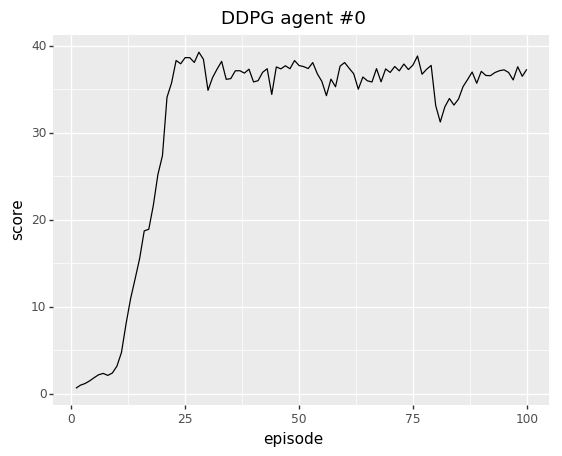

INFO:drl_ctrl.control:Ensuring output directory exists: ../training_output/tuning_ddpg/238f0558-5546-4260-883f-a4317f88bdb5


<ggplot: (8757373832470)>
{'n_episodes': 500, 'update_every': 20, 'num_updates': 10, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 30.0, 'max_t': 1000, 'learning_rate_actor': 0.002, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.001, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma': 0.1, 'agent_seed': 11111, 'logging_freq': 1}


Episode 1	Average Score: 0.36
Episode 2	Average Score: 0.46
Episode 3	Average Score: 0.50
Episode 4	Average Score: 0.44
Episode 5	Average Score: 0.41
Episode 6	Average Score: 0.37
Episode 7	Average Score: 0.39
Episode 8	Average Score: 0.44
Episode 9	Average Score: 0.52
Episode 10	Average Score: 0.57
Episode 11	Average Score: 0.61
Episode 12	Average Score: 0.63
Episode 13	Average Score: 0.65
Episode 14	Average Score: 0.69
Episode 15	Average Score: 0.72
Episode 16	Average Score: 0.73
Episode 17	Average Score: 0.78
Episode 18	Average Score: 0.81
Episode 19	Average Score: 0.85
Episode 20	Average Score: 0.90
Episode 21	Average Score: 0.93
Episode 22	Average Score: 0.97
Episode 23	Average Score: 1.02
Episode 24	Average Score: 1.10
Episode 25	Average Score: 1.14
Episode 26	Average Score: 1.17
Episode 27	Average Score: 1.22
Episode 28	Average Score: 1.27
Episode 29	Average Score: 1.31
Episode 30	Average Score: 1.35
Episode 31	Average Score: 1.40
Episode 32	Average Score: 1.43
Episode 33	Averag

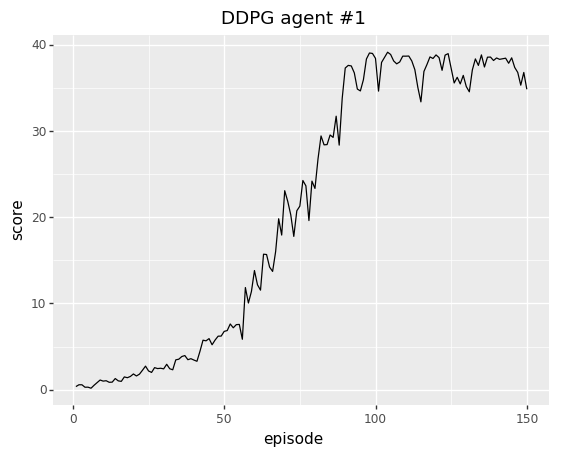

INFO:drl_ctrl.control:Ensuring output directory exists: ../training_output/tuning_ddpg/b67eb3ad-35da-4eb6-b153-3b481bc92d93


<ggplot: (8757312826060)>
{'n_episodes': 500, 'update_every': 10, 'num_updates': 20, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 30.0, 'max_t': 1000, 'learning_rate_actor': 0.002, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.001, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma': 0.2, 'agent_seed': 11111, 'logging_freq': 1}


Episode 1	Average Score: 0.50
Episode 2	Average Score: 0.66
Episode 3	Average Score: 0.72
Episode 4	Average Score: 0.82
Episode 5	Average Score: 0.92
Episode 6	Average Score: 1.09
Episode 7	Average Score: 1.25
Episode 8	Average Score: 1.42
Episode 9	Average Score: 1.52
Episode 10	Average Score: 1.65
Episode 11	Average Score: 1.83
Episode 12	Average Score: 1.94
Episode 13	Average Score: 2.13
Episode 14	Average Score: 2.36
Episode 15	Average Score: 2.73
Episode 16	Average Score: 3.04
Episode 17	Average Score: 3.39
Episode 18	Average Score: 3.78
Episode 19	Average Score: 4.36
Episode 20	Average Score: 4.90
Episode 21	Average Score: 5.73
Episode 22	Average Score: 6.53
Episode 23	Average Score: 7.44
Episode 24	Average Score: 8.23
Episode 25	Average Score: 9.02
Episode 26	Average Score: 9.84
Episode 27	Average Score: 10.70
Episode 28	Average Score: 11.61
Episode 29	Average Score: 12.51
Episode 30	Average Score: 13.36
Episode 31	Average Score: 14.15
Episode 32	Average Score: 14.91
Episode 33	

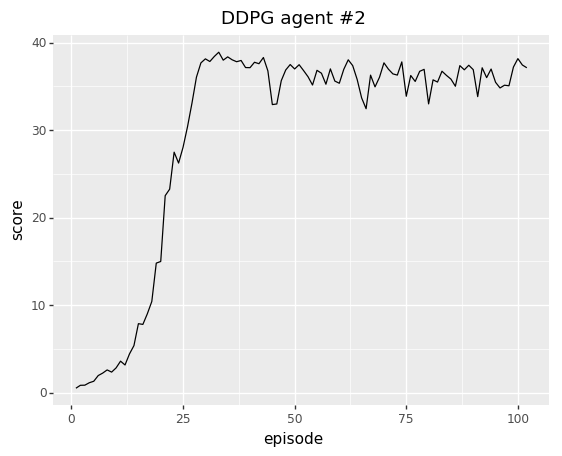

INFO:drl_ctrl.control:Ensuring output directory exists: ../training_output/tuning_ddpg/f3ada71f-8663-476f-a40c-83113947e076


<ggplot: (-9223363279626163964)>
{'n_episodes': 500, 'update_every': 20, 'num_updates': 10, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 30.0, 'max_t': 1000, 'learning_rate_actor': 0.002, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.001, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma': 0.2, 'agent_seed': 11111, 'logging_freq': 1}


Episode 1	Average Score: 0.51
Episode 2	Average Score: 0.27
Episode 3	Average Score: 0.18
Episode 4	Average Score: 0.15
Episode 5	Average Score: 0.19
Episode 6	Average Score: 0.20
Episode 7	Average Score: 0.26
Episode 8	Average Score: 0.31
Episode 9	Average Score: 0.34
Episode 10	Average Score: 0.34
Episode 11	Average Score: 0.37
Episode 12	Average Score: 0.38
Episode 13	Average Score: 0.40
Episode 14	Average Score: 0.42
Episode 15	Average Score: 0.45
Episode 16	Average Score: 0.48
Episode 17	Average Score: 0.51
Episode 18	Average Score: 0.52
Episode 19	Average Score: 0.55
Episode 20	Average Score: 0.57
Episode 21	Average Score: 0.59
Episode 22	Average Score: 0.56
Episode 23	Average Score: 0.54
Episode 24	Average Score: 0.53
Episode 25	Average Score: 0.52
Episode 26	Average Score: 0.51
Episode 27	Average Score: 0.53
Episode 28	Average Score: 0.53
Episode 29	Average Score: 0.54
Episode 30	Average Score: 0.53
Episode 31	Average Score: 0.53
Episode 32	Average Score: 0.55
Episode 33	Averag

Episode 261	Average Score: 1.65
Episode 262	Average Score: 1.66
Episode 263	Average Score: 1.66
Episode 264	Average Score: 1.67
Episode 265	Average Score: 1.68
Episode 266	Average Score: 1.68
Episode 267	Average Score: 1.69
Episode 268	Average Score: 1.69
Episode 269	Average Score: 1.70
Episode 270	Average Score: 1.70
Episode 271	Average Score: 1.70
Episode 272	Average Score: 1.70
Episode 273	Average Score: 1.71
Episode 274	Average Score: 1.71
Episode 275	Average Score: 1.71
Episode 276	Average Score: 1.72
Episode 277	Average Score: 1.72
Episode 278	Average Score: 1.73
Episode 279	Average Score: 1.73
Episode 280	Average Score: 1.73
Episode 281	Average Score: 1.74
Episode 282	Average Score: 1.75
Episode 283	Average Score: 1.76
Episode 284	Average Score: 1.76
Episode 285	Average Score: 1.77
Episode 286	Average Score: 1.78
Episode 287	Average Score: 1.79
Episode 288	Average Score: 1.80
Episode 289	Average Score: 1.80
Episode 290	Average Score: 1.81
Episode 291	Average Score: 1.82
Episode 

INFO:drl_ctrl.control:Training scores saved successfully!
INFO:drl_ctrl.control:Saving training metadata to ../training_output/tuning_ddpg/f3ada71f-8663-476f-a40c-83113947e076/metadata.json
INFO:drl_ctrl.control:Training metadata saved successfully!


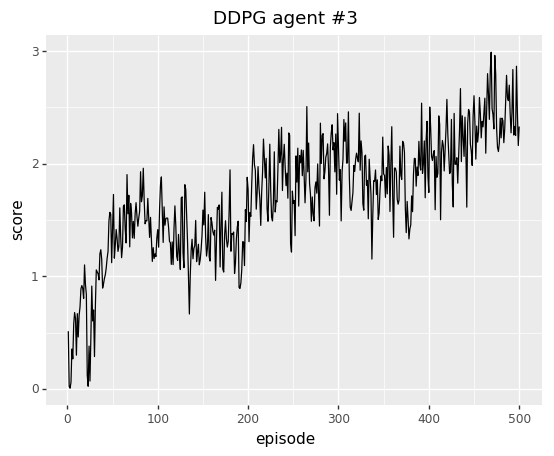

INFO:drl_ctrl.control:Ensuring output directory exists: ../training_output/tuning_ddpg/5644cd9d-e6fd-4316-b0d0-3001e0e5f1e9


<ggplot: (-9223363279483066687)>
{'n_episodes': 500, 'update_every': 10, 'num_updates': 20, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.99, 'mean_score_threshold': 30.0, 'max_t': 1000, 'learning_rate_actor': 0.002, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.001, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma': 0.1, 'agent_seed': 11111, 'logging_freq': 1}


Episode 1	Average Score: 0.57
Episode 2	Average Score: 0.63
Episode 3	Average Score: 0.71
Episode 4	Average Score: 0.85
Episode 5	Average Score: 1.09
Episode 6	Average Score: 1.18
Episode 7	Average Score: 1.30
Episode 8	Average Score: 1.55
Episode 9	Average Score: 1.87
Episode 10	Average Score: 2.21
Episode 11	Average Score: 2.78
Episode 12	Average Score: 3.53
Episode 13	Average Score: 4.26
Episode 14	Average Score: 4.94
Episode 15	Average Score: 5.86
Episode 16	Average Score: 6.54
Episode 17	Average Score: 7.48
Episode 18	Average Score: 8.38
Episode 19	Average Score: 9.29
Episode 20	Average Score: 10.15
Episode 21	Average Score: 11.06
Episode 22	Average Score: 11.97
Episode 23	Average Score: 12.90
Episode 24	Average Score: 13.86
Episode 25	Average Score: 14.81
Episode 26	Average Score: 15.65
Episode 27	Average Score: 16.43
Episode 28	Average Score: 17.17
Episode 29	Average Score: 17.85
Episode 30	Average Score: 18.48
Episode 31	Average Score: 19.11
Episode 32	Average Score: 19.72
Epis

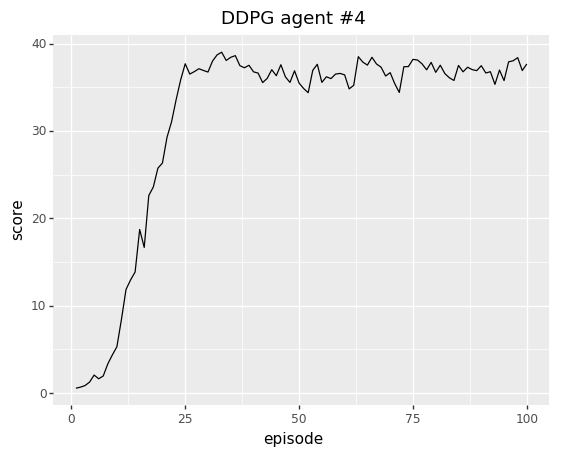

INFO:drl_ctrl.control:Ensuring output directory exists: ../training_output/tuning_ddpg/9c5b7f31-5ff9-438a-abf3-38df3ac9d72e


<ggplot: (8757215808832)>
{'n_episodes': 500, 'update_every': 20, 'num_updates': 10, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.99, 'mean_score_threshold': 30.0, 'max_t': 1000, 'learning_rate_actor': 0.002, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.001, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma': 0.1, 'agent_seed': 11111, 'logging_freq': 1}


Episode 1	Average Score: 0.65
Episode 2	Average Score: 0.67
Episode 3	Average Score: 0.60
Episode 4	Average Score: 0.61
Episode 5	Average Score: 0.55
Episode 6	Average Score: 0.51
Episode 7	Average Score: 0.48
Episode 8	Average Score: 0.55
Episode 9	Average Score: 0.58
Episode 10	Average Score: 0.55
Episode 11	Average Score: 0.53
Episode 12	Average Score: 0.50
Episode 13	Average Score: 0.50
Episode 14	Average Score: 0.52
Episode 15	Average Score: 0.56
Episode 16	Average Score: 0.59
Episode 17	Average Score: 0.64
Episode 18	Average Score: 0.70
Episode 19	Average Score: 0.74
Episode 20	Average Score: 0.80
Episode 21	Average Score: 0.82
Episode 22	Average Score: 0.85
Episode 23	Average Score: 0.92
Episode 24	Average Score: 0.97
Episode 25	Average Score: 1.02
Episode 26	Average Score: 1.05
Episode 27	Average Score: 1.08
Episode 28	Average Score: 1.12
Episode 29	Average Score: 1.16
Episode 30	Average Score: 1.20
Episode 31	Average Score: 1.26
Episode 32	Average Score: 1.30
Episode 33	Averag

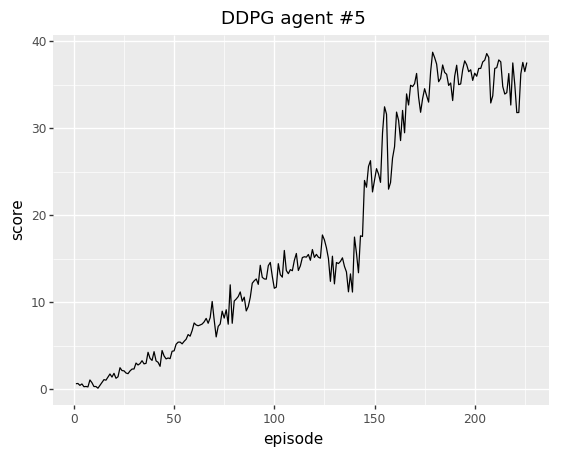

INFO:drl_ctrl.control:Ensuring output directory exists: ../training_output/tuning_ddpg/a1bf22ca-d227-4737-b082-11717ba759e5


<ggplot: (-9223363279626142141)>
{'n_episodes': 500, 'update_every': 10, 'num_updates': 20, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.99, 'mean_score_threshold': 30.0, 'max_t': 1000, 'learning_rate_actor': 0.002, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.001, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma': 0.2, 'agent_seed': 11111, 'logging_freq': 1}


Episode 1	Average Score: 0.17
Episode 2	Average Score: 0.32
Episode 3	Average Score: 0.49
Episode 4	Average Score: 0.53
Episode 5	Average Score: 0.56
Episode 6	Average Score: 0.59
Episode 7	Average Score: 0.68
Episode 8	Average Score: 0.76
Episode 9	Average Score: 0.82
Episode 10	Average Score: 0.85
Episode 11	Average Score: 0.90
Episode 12	Average Score: 0.87
Episode 13	Average Score: 0.87
Episode 14	Average Score: 0.90
Episode 15	Average Score: 0.99
Episode 16	Average Score: 1.07
Episode 17	Average Score: 1.19
Episode 18	Average Score: 1.31
Episode 19	Average Score: 1.36
Episode 20	Average Score: 1.49
Episode 21	Average Score: 1.64
Episode 22	Average Score: 1.73
Episode 23	Average Score: 1.87
Episode 24	Average Score: 2.00
Episode 25	Average Score: 2.16
Episode 26	Average Score: 2.31
Episode 27	Average Score: 2.50
Episode 28	Average Score: 2.71
Episode 29	Average Score: 2.96
Episode 30	Average Score: 3.23
Episode 31	Average Score: 3.46
Episode 32	Average Score: 3.75
Episode 33	Averag

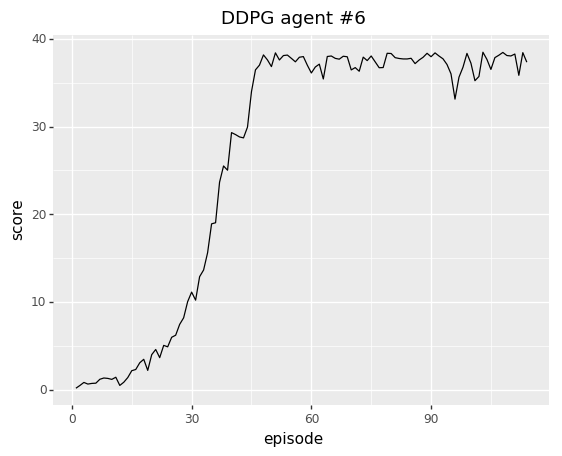

INFO:drl_ctrl.control:Ensuring output directory exists: ../training_output/tuning_ddpg/7262f3bf-2a98-482c-91a8-87c72f19bb36


<ggplot: (-9223363279626160268)>
{'n_episodes': 500, 'update_every': 20, 'num_updates': 10, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.99, 'mean_score_threshold': 30.0, 'max_t': 1000, 'learning_rate_actor': 0.002, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.001, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma': 0.2, 'agent_seed': 11111, 'logging_freq': 1}


Episode 1	Average Score: 0.80
Episode 2	Average Score: 0.88
Episode 3	Average Score: 0.81
Episode 4	Average Score: 0.64
Episode 5	Average Score: 0.56
Episode 6	Average Score: 0.48
Episode 7	Average Score: 0.41
Episode 8	Average Score: 0.37
Episode 9	Average Score: 0.40
Episode 10	Average Score: 0.47
Episode 11	Average Score: 0.50
Episode 12	Average Score: 0.56
Episode 13	Average Score: 0.59
Episode 14	Average Score: 0.61
Episode 15	Average Score: 0.64
Episode 16	Average Score: 0.65
Episode 17	Average Score: 0.68
Episode 18	Average Score: 0.72
Episode 19	Average Score: 0.75
Episode 20	Average Score: 0.78
Episode 21	Average Score: 0.80
Episode 22	Average Score: 0.82
Episode 23	Average Score: 0.85
Episode 24	Average Score: 0.87
Episode 25	Average Score: 0.90
Episode 26	Average Score: 0.93
Episode 27	Average Score: 0.94
Episode 28	Average Score: 0.98
Episode 29	Average Score: 1.02
Episode 30	Average Score: 1.06
Episode 31	Average Score: 1.08
Episode 32	Average Score: 1.12
Episode 33	Averag

Episode 256	Average Score: 20.41
Episode 257	Average Score: 20.36
Episode 258	Average Score: 20.32
Episode 259	Average Score: 20.30
Episode 260	Average Score: 20.29
Episode 261	Average Score: 20.29
Episode 262	Average Score: 20.26
Episode 263	Average Score: 20.22
Episode 264	Average Score: 20.21
Episode 265	Average Score: 20.20
Episode 266	Average Score: 20.19
Episode 267	Average Score: 20.20
Episode 268	Average Score: 20.21
Episode 269	Average Score: 20.20
Episode 270	Average Score: 20.22
Episode 271	Average Score: 20.23
Episode 272	Average Score: 20.21
Episode 273	Average Score: 20.17
Episode 274	Average Score: 20.14
Episode 275	Average Score: 20.09
Episode 276	Average Score: 20.07
Episode 277	Average Score: 20.05
Episode 278	Average Score: 20.03
Episode 279	Average Score: 20.04
Episode 280	Average Score: 20.04
Episode 281	Average Score: 20.03
Episode 282	Average Score: 20.05
Episode 283	Average Score: 20.02
Episode 284	Average Score: 20.00
Episode 285	Average Score: 19.99
Episode 28

INFO:drl_ctrl.control:Actor model weights saved successfully!
INFO:drl_ctrl.control:Saving critic network model weights to ../training_output/tuning_ddpg/7262f3bf-2a98-482c-91a8-87c72f19bb36/weights_critic.pth
INFO:drl_ctrl.control:Critic model weights saved successfully!
INFO:drl_ctrl.control:Saving training scores to ../training_output/tuning_ddpg/7262f3bf-2a98-482c-91a8-87c72f19bb36/scores.csv
INFO:drl_ctrl.control:Training scores saved successfully!
INFO:drl_ctrl.control:Saving training metadata to ../training_output/tuning_ddpg/7262f3bf-2a98-482c-91a8-87c72f19bb36/metadata.json
INFO:drl_ctrl.control:Training metadata saved successfully!


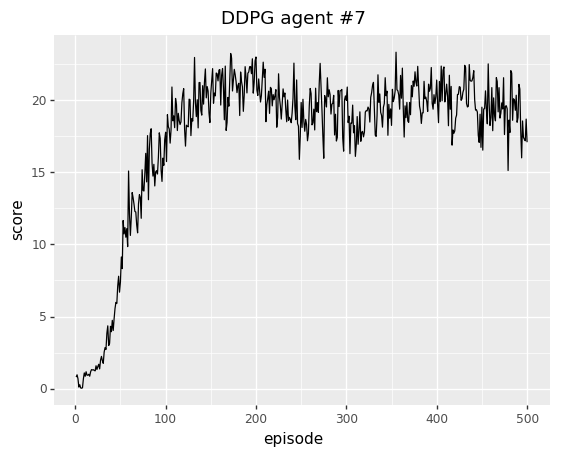

<ggplot: (-9223363279626168390)>


In [6]:
for i, p in enumerate(candidate_params, start=0):
    training_params = {**default_params, **p}
    print(training_params)
    u_name = str(uuid.uuid4())
    out_dir = tuning_output_dir.joinpath(u_name)
    out_dir.mkdir(parents=True, exist_ok=True)
    with open(out_dir.joinpath("training_params.json"), "w") as f:
        json.dump(training_params, f, indent=2)
        
    control.training(env, out_dir, **training_params)
    
    df_scores = su.read_scores(out_dir)
    p_scores = su.plot_scores(df_scores, f"DDPG agent #{i}")
    print(p_scores)

In [7]:
best_params_so_far = {
 'n_episodes': 500,
 'update_every': 10,
 'num_updates': 20,
 'buffer_size': 100000,
 'batch_size': 128,
 'gamma_discount_factor': 0.95,
 'mean_score_threshold': 30.0,
 'max_t': 1000,
 'learning_rate_actor': 0.002,
 'learning_rate_critic': 0.001,
 'tau_soft_update': 0.001,
 'l2_weight_decay': 0,
 'has_ou_noise': True,
 'ou_noise_mu': 0.0,
 'ou_noise_theta': 0.15,
 'ou_noise_sigma': 0.1,
 'agent_seed': 111111,
 'logging_freq': 1}

output_dir = '../training_output/tuning_ddpg/394b0ed4-69cb-4260-ae85-67ca73668c18'

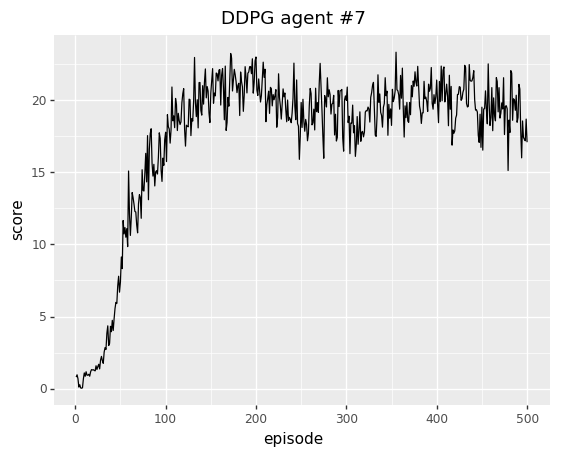

<ggplot: (-9223363279480941943)>


In [8]:
df_scores = su.read_scores(out_dir)
p_scores = su.plot_scores(df_scores, f"DDPG agent #{i}")
print(p_scores)

In [9]:
# env.close()